<a href="https://colab.research.google.com/github/MuhammadBasilKhan/Deep-learning-medical-classification/blob/main/facemaskmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
data_dir='/content/drive/MyDrive/drive/facemask/data'
imagesize=(224,224)
batchsize=32


In [ ]:
train_data_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_data_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
x=[]
y=[]


In [ ]:
for label, folder_name in enumerate(['with_mask', 'without_mask']):
    folder_path = os.path.join(data_dir, folder_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, imagesize)
            x.append(img)
            y.append(label)


In [ ]:
x=np.array(x)
y=np.array(y)


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,stratify=y)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(imagesize[0],imagesize[1],3)))

In [ ]:
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_data_gen.flow(x_train,y_train,batch_size=batchsize),
                  validation_data=val_data_gen.flow(x_val,y_val),
                  epochs=10,verbose=1)

Epoch 1/10
189/189 [==============================] - 85s 395ms/step - loss: 0.3517 - accuracy: 0.8502 - val_loss: 0.2629 - val_accuracy: 0.8855
Epoch 2/10
189/189 [==============================] - 73s 382ms/step - loss: 0.2501 - accuracy: 0.8985 - val_loss: 0.2738 - val_accuracy: 0.8875
Epoch 3/10
189/189 [==============================] - 73s 384ms/step - loss: 0.2146 - accuracy: 0.9144 - val_loss: 0.1710 - val_accuracy: 0.9292
Epoch 4/10
189/189 [==============================] - 73s 385ms/step - loss: 0.1909 - accuracy: 0.9262 - val_loss: 0.1502 - val_accuracy: 0.9451
Epoch 5/10
189/189 [==============================] - 73s 385ms/step - loss: 0.1781 - accuracy: 0.9355 - val_loss: 0.1353 - val_accuracy: 0.9537
Epoch 6/10
189/189 [==============================] - 73s 384ms/step - loss: 0.1613 - accuracy: 0.9421 - val_loss: 0.1305 - val_accuracy: 0.9550
Epoch 7/10
189/189 [==============================] - 73s 388ms/step - loss: 0.1438 - accuracy: 0.9535 - val_loss: 0.1200 - val_ac

In [ ]:
  model.evaluate(x_train,y_train)

189/189 [==============================] - 3s 14ms/step - loss: 7.5442 - accuracy: 0.9715


[7.544226169586182, 0.9715325832366943]

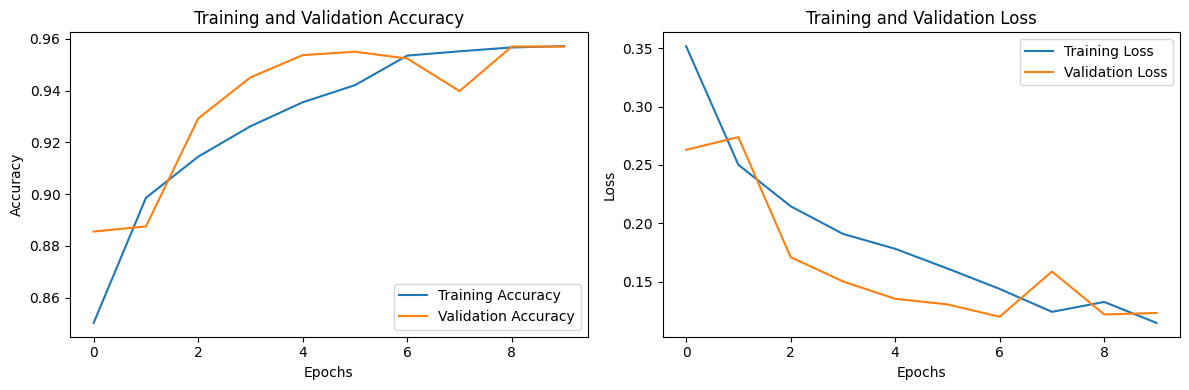

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


In [ ]:
model.save('facemask.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 79ms/step


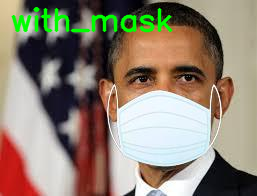

In [ ]:
#for colab
import cv2
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow

# Load the trained model
model = load_model('/content/facemask.h5')

# Set the size of the input images
img_size = (224, 224)

# Class labels
class_labels = ['with_mask', 'without_mask']

def preprocess_image(img_path):
    """Preprocess the input image to the required size and normalize it."""
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError("Image not found or unable to read the image.")
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image(img_path):
    """Predict the class of the input image and display the image with the predicted class name."""
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = class_labels[int(prediction[0][0] > 0.70)]

    # Display the image with the predicted class name
    original_img = cv2.imread(img_path)
    cv2.putText(original_img, predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2_imshow(original_img)  # Use cv2_imshow instead of cv2.imshow

# Example usage
img_path = '/content/drive/MyDrive/drive/facemask/data/with_mask/with_mask_1004.jpg'
predict_image(img_path)
